In [1]:
# python standard library packages
import os
import sys
import inspect
sys.path.append(os.path.dirname(os.getcwd())) # appending the parent directory to the PATH interpreter

# third-party packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# my modules
import _helper

In [2]:
%load_ext autoreload
%autoreload 2
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
%matplotlib inline
# after running %matplotlib inline, the plots will be displayed in the output cell whenever you call show()

In [3]:
original_train = pd.read_csv('../data/train.csv')
original_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(f"Shape of dataframe: {original_train.shape}")

Shape of dataframe: (8693, 14)


In [5]:
original_train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
original_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
original_train.duplicated().value_counts()

False    8693
dtype: int64

In [8]:
original_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
original_train.sample(n=20, random_state=109)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4373,4655_01,Europa,True,B/154/P,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,Ainkard Seflock,True
7511,8034_01,Mars,True,E/532/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Krus Bost,False
8229,8796_02,Earth,False,F/1704/S,TRAPPIST-1e,14.0,False,588.0,144.0,1.0,0.0,168.0,Hillie Jorden,False
2245,2404_03,Europa,False,C/86/S,55 Cancri e,36.0,False,828.0,5553.0,130.0,47.0,1171.0,Girtan Oilpuring,True
5777,6120_01,Earth,False,F/1169/S,PSO J318.5-22,13.0,False,0.0,1180.0,0.0,NaN,0.0,Garlie Flynnis,True
7005,7450_01,Earth,False,G/1205/P,TRAPPIST-1e,23.0,False,509.0,0.0,193.0,0.0,2.0,Armene Sykess,False
2625,2809_01,Earth,True,G/453/P,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Dianie Ellahan,True
5500,5868_01,Earth,False,E/379/S,TRAPPIST-1e,62.0,False,104.0,53.0,194.0,436.0,0.0,Yolace Blangibson,False
4825,5145_01,Earth,True,G/841/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mathison,True
7449,7972_01,Europa,True,B/260/P,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Hadlam Cattyried,True


In [10]:
original_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [11]:
original_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

## Quick Notes

* No duplicate values
* around 200 missing values in each column
    * want to check overlapping rows for missing values
    * want to check missing values in each row
* look like boolean values for `CryoSleep`, `VIP`, `Transported`
    * want to check this; if so, convert them to integer values
* `Destination` and `HomePlanet` have 3 unique values
    * could start by just handling this as ordinal values
* looks like `PassengerID` can have a ..._02 if there's multiple family members
* could potentially split `Cabin` and `PassengerID`

In [12]:
original_train.isnull().sum(axis=1).sort_values(ascending=False).head(20)

3882    3
7211    3
2639    3
4164    3
7682    3
6112    3
5806    3
3535    3
7019    3
6904    3
5208    3
2762    3
3072    3
4548    3
5409    3
6057    3
1203    3
3946    2
7434    2
6688    2
dtype: int64

In [13]:
original_train.iloc[3882]

PassengerId              4167_01
HomePlanet                 Earth
CryoSleep                  False
Cabin                        NaN
Destination        PSO J318.5-22
Age                          NaN
VIP                          NaN
RoomService                  0.0
FoodCourt                  440.0
ShoppingMall                 0.0
Spa                          0.0
VRDeck                     334.0
Name            Ninaha Deckerson
Transported                False
Name: 3882, dtype: object

In [14]:
# get all the rows with missing values
print(f"Number of rows with missing values: {original_train.shape[0] - original_train.dropna().shape[0]}")

Number of rows with missing values: 2087


## Quick Analysis - Missing Values
* no single rows that have a lot of missing values to drop
* could just start off by doing median/mode values, but would want to check on the distributions for these first

In [15]:
print(original_train["Transported"].value_counts())
print(original_train["VIP"].value_counts())
print(original_train["CryoSleep"].value_counts())

True     4378
False    4315
Name: Transported, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64


In [16]:
df_bool_conv_int = original_train.copy()
df_bool_conv_int["Transported"] = 1 * df_bool_conv_int["Transported"]
df_bool_conv_int["VIP"] = 1 * df_bool_conv_int["VIP"]
df_bool_conv_int["CryoSleep"] = 1 * df_bool_conv_int["CryoSleep"]
print(df_bool_conv_int.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object


In [17]:
df_bool_conv_int.sample(10, random_state=109)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4373,4655_01,Europa,1,B/154/P,55 Cancri e,32.0,0,0.0,0.0,0.0,0.0,0.0,Ainkard Seflock,1
7511,8034_01,Mars,1,E/532/S,TRAPPIST-1e,18.0,0,0.0,0.0,0.0,0.0,0.0,Krus Bost,0
8229,8796_02,Earth,0,F/1704/S,TRAPPIST-1e,14.0,0,588.0,144.0,1.0,0.0,168.0,Hillie Jorden,0
2245,2404_03,Europa,0,C/86/S,55 Cancri e,36.0,0,828.0,5553.0,130.0,47.0,1171.0,Girtan Oilpuring,1
5777,6120_01,Earth,0,F/1169/S,PSO J318.5-22,13.0,0,0.0,1180.0,0.0,NaN,0.0,Garlie Flynnis,1
7005,7450_01,Earth,0,G/1205/P,TRAPPIST-1e,23.0,0,509.0,0.0,193.0,0.0,2.0,Armene Sykess,0
2625,2809_01,Earth,1,G/453/P,TRAPPIST-1e,41.0,0,0.0,0.0,0.0,0.0,0.0,Dianie Ellahan,1
5500,5868_01,Earth,0,E/379/S,TRAPPIST-1e,62.0,0,104.0,53.0,194.0,436.0,0.0,Yolace Blangibson,0
4825,5145_01,Earth,1,G/841/S,TRAPPIST-1e,18.0,0,0.0,0.0,0.0,0.0,0.0,Shaele Mathison,1
7449,7972_01,Europa,1,B/260/P,55 Cancri e,33.0,0,0.0,0.0,0.0,0.0,0.0,Hadlam Cattyried,1


In [18]:
print(df_bool_conv_int["HomePlanet"].value_counts(dropna=False))

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64


In [19]:
print(df_bool_conv_int["Destination"].value_counts(dropna=False))

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64


In [20]:
# casting CryoSleep, Transported, VIP to integers

print(df_bool_conv_int.dtypes)

# must be Int64 or else Pandas can't handle null vaues
# https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int
col_to_conv = ["CryoSleep", "Transported", "VIP"]
for col in col_to_conv:
    df_bool_conv_int[col] = df_bool_conv_int[col].astype("Int64")

print(df_bool_conv_int.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object
PassengerId      object
HomePlanet       object
CryoSleep         Int64
Cabin            object
Destination      object
Age             float64
VIP               Int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       Int64
dtype: object


In [21]:
df_bool_conv_int.sample(10, random_state=109)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4373,4655_01,Europa,1,B/154/P,55 Cancri e,32.0,0,0.0,0.0,0.0,0.0,0.0,Ainkard Seflock,1
7511,8034_01,Mars,1,E/532/S,TRAPPIST-1e,18.0,0,0.0,0.0,0.0,0.0,0.0,Krus Bost,0
8229,8796_02,Earth,0,F/1704/S,TRAPPIST-1e,14.0,0,588.0,144.0,1.0,0.0,168.0,Hillie Jorden,0
2245,2404_03,Europa,0,C/86/S,55 Cancri e,36.0,0,828.0,5553.0,130.0,47.0,1171.0,Girtan Oilpuring,1
5777,6120_01,Earth,0,F/1169/S,PSO J318.5-22,13.0,0,0.0,1180.0,0.0,NaN,0.0,Garlie Flynnis,1
7005,7450_01,Earth,0,G/1205/P,TRAPPIST-1e,23.0,0,509.0,0.0,193.0,0.0,2.0,Armene Sykess,0
2625,2809_01,Earth,1,G/453/P,TRAPPIST-1e,41.0,0,0.0,0.0,0.0,0.0,0.0,Dianie Ellahan,1
5500,5868_01,Earth,0,E/379/S,TRAPPIST-1e,62.0,0,104.0,53.0,194.0,436.0,0.0,Yolace Blangibson,0
4825,5145_01,Earth,1,G/841/S,TRAPPIST-1e,18.0,0,0.0,0.0,0.0,0.0,0.0,Shaele Mathison,1
7449,7972_01,Europa,1,B/260/P,55 Cancri e,33.0,0,0.0,0.0,0.0,0.0,0.0,Hadlam Cattyried,1


## Visualization Practice with Matplotlib

In [22]:
print(df_bool_conv_int["Destination"].value_counts(dropna=False).index.tolist())
print(df_bool_conv_int["Destination"].value_counts(dropna=False).tolist())

['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan]
[5915, 1800, 796, 182]


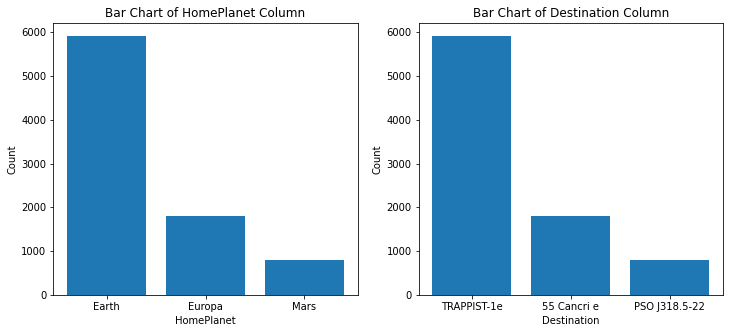

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

for i, col in enumerate(["HomePlanet","Destination"]):
    # print(df_bool_conv_int[col].value_counts(dropna=False).index.tolist())
    ax[i].bar(x=df_bool_conv_int[col].value_counts().index.tolist(), height=df_bool_conv_int["Destination"].value_counts().tolist())
    ax[i].set_xlabel(f"{col}")
    ax[i].set_ylabel("Count")
    ax[i].set_title(f"Bar Chart of {col} Column")

plt.show()

In [24]:
print(df_bool_conv_int.loc[df_bool_conv_int["Transported"] == 1, "Destination"].value_counts(dropna=False).index.tolist())
print(df_bool_conv_int.loc[df_bool_conv_int["Transported"] == 1, "Destination"].value_counts(dropna=False).tolist())

['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan]
[2787, 1098, 401, 92]


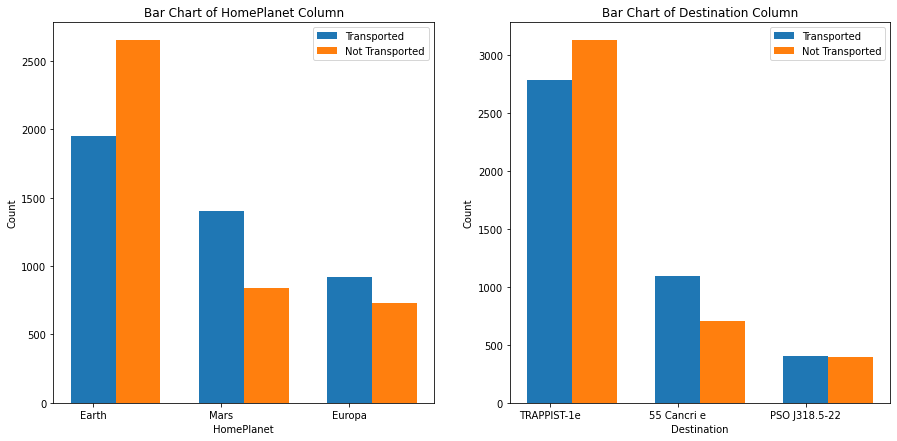

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

for i, col in enumerate(["HomePlanet","Destination"]):
    
    
    
    # getting the column as a Series, separating out the transported from the non-transported individuals
    col_transported = df_bool_conv_int.loc[df_bool_conv_int["Transported"] == 1, col]
    col_not_transported = df_bool_conv_int.loc[df_bool_conv_int["Transported"] == 0, col]
    
    # utilizing this Stack overflow: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
    # utilizing this GeeksForGeeks article: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
    ind = np.arange(col_transported.nunique()) # the x locations for the groups
    width = 0.35       # the width of the bars
    # print(ind)
    rects1 = ax[i].bar(x=ind, height=col_transported.value_counts().tolist(), width=width, label='Transported')
    
    rects2 = ax[i].bar(x=ind + width, height=col_not_transported.value_counts().tolist(), width=width, label = 'Not Transported')
    
    
    ax[i].set_xlabel(f"{col}")
    ax[i].set_ylabel("Count")
    ax[i].set_title(f"Bar Chart of {col} Column")
    ax[i].legend()
    
    # needed to explicitly set the tick locations or it would give too many ticks
    ax[i].set_xticks(ind)
    ax[i].set_xticklabels(col_not_transported.value_counts().index.tolist())


plt.show()

In [26]:
'''
https://stackoverflow.com/questions/21720022/find-all-columns-of-dataframe-in-pandas-whose-type-is-float-or-a-particular-typ

# select the float columns
df_num = df.select_dtypes(include=[np.float])
# select non-numeric columns
df_num = df.select_dtypes(exclude=[np.number])
'''

print(df_bool_conv_int.dtypes)

float_columns = df_bool_conv_int.select_dtypes(include=['float64']).columns.tolist()
print(float_columns)
print(df_bool_conv_int.select_dtypes(include=['float64']).dtypes)

PassengerId      object
HomePlanet       object
CryoSleep         Int64
Cabin            object
Destination      object
Age             float64
VIP               Int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       Int64
dtype: object
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


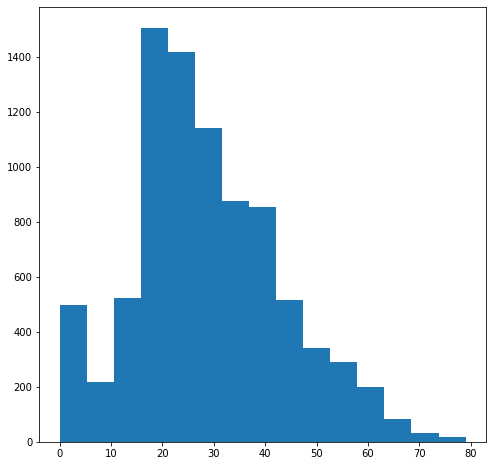

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.hist(df_bool_conv_int["Age"], bins=15)
                       
plt.show()

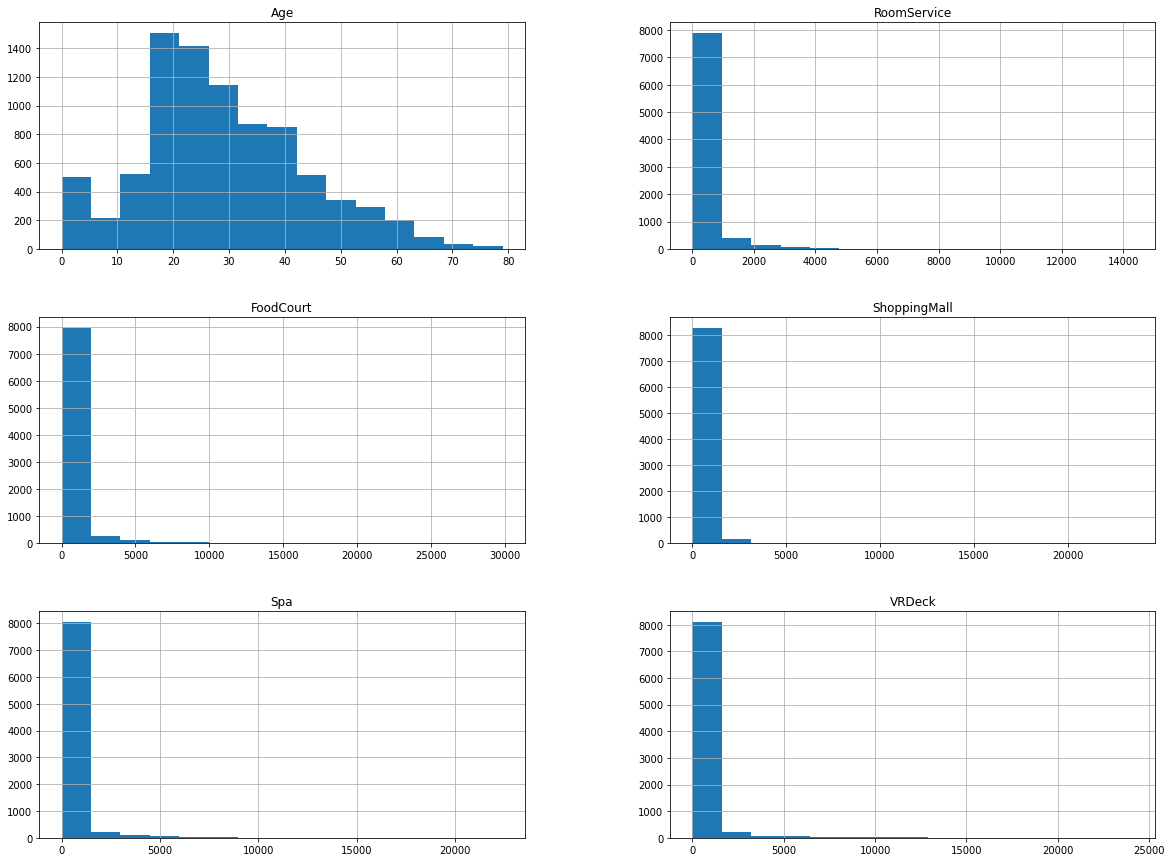

In [28]:
df_bool_conv_int[float_columns].hist(bins = 15, figsize = (20,15))
plt.show()

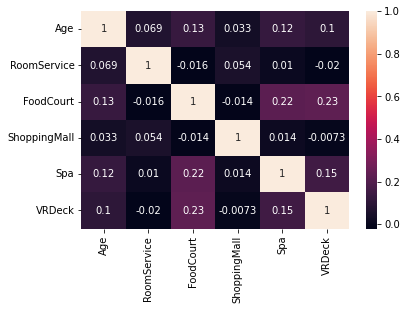

In [29]:
corr_matrix = df_bool_conv_int[float_columns].corr()

sns.heatmap(corr_matrix, annot=True)

plt.show()

In [30]:
df_bool_conv_int.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

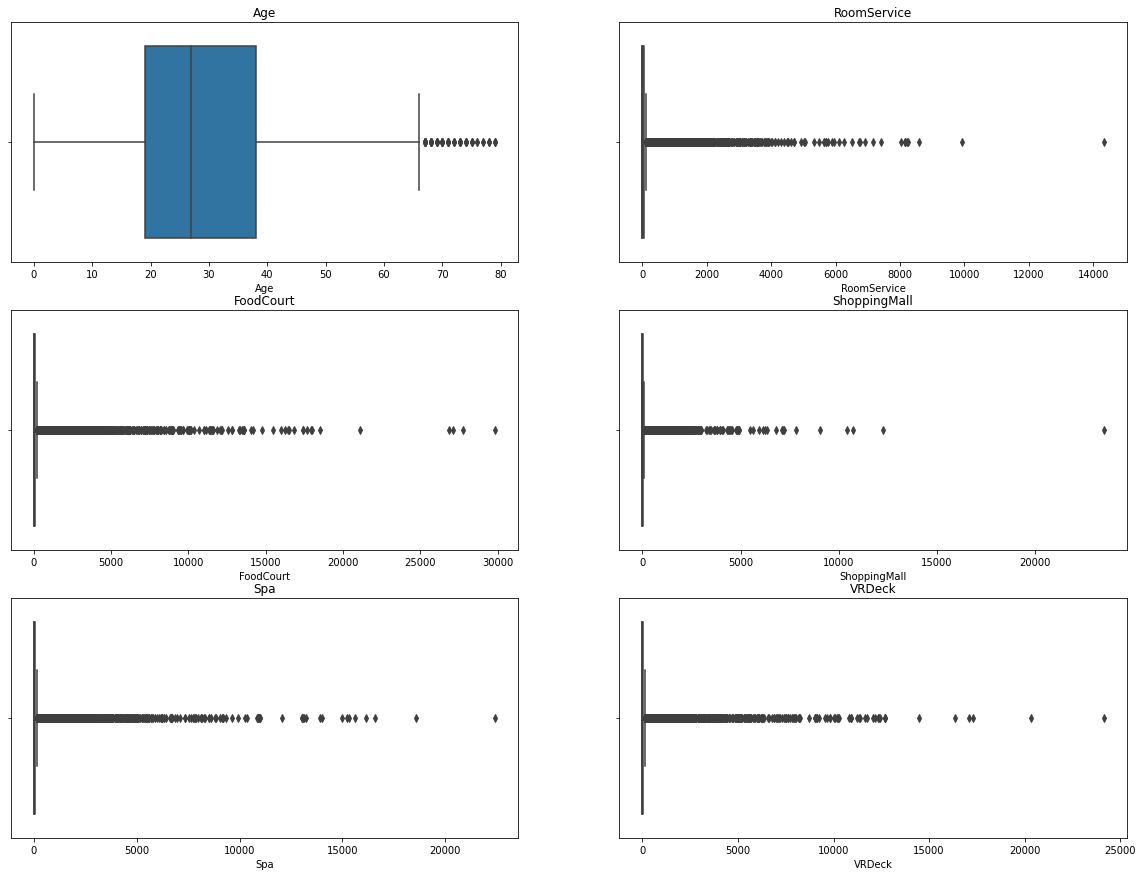

In [31]:
# looking at boxplot to better see outliers

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

for i, ax in enumerate(axes.ravel()):
    sns.boxplot(x=df_bool_conv_int[float_columns[i]], ax=ax)
    ax.set_title(float_columns[i])

plt.show()

## Analysis

* should go back and convert to int data types for `df_bool_conv_int`
* forgot to check for outliers!
* want to start building functions in a *_helpers.py* file
    * build one for dropping all columns with missing data
    * build one for using the median values for numeric, and most-frequent for non-numeric

## Missing Value Handling

In [32]:
print(id(df_bool_conv_int))
print(df_bool_conv_int.shape)

140045653687744
(8693, 14)


In [33]:
df_remove_na = _helper.remove_rows_with_nulls(df_bool_conv_int)

In [34]:
print(id(df_remove_na))
print(df_remove_na.shape)

140045609254096
(6606, 14)


In [35]:
print(f"{df_bool_conv_int.shape[0] - df_remove_na.shape[0]} rows removed")
print(f"Number of missing values in df_remove_na: {df_remove_na.isnull().sum().sum()}")

2087 rows removed
Number of missing values in df_remove_na: 0


In [41]:
df_remove_na.dtypes

PassengerId      object
HomePlanet       object
CryoSleep         Int64
Cabin            object
Destination      object
Age             float64
VIP               Int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       Int64
dtype: object

In [42]:
df_remove_na.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,0.353012,28.894036,0.024523,222.991674,478.958523,178.356494,313.161520,303.780048,0.503633
std,0.477943,14.533429,0.154678,644.987936,1678.592291,576.328407,1144.016291,1127.142166,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,49.000000,82.750000,30.000000,65.000000,52.000000,1.000000
max,1.000000,79.000000,1.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000,1.000000


In [38]:
df_fill_na = _helper.fill_numeric_missing_values(df_bool_conv_int)
df_fill_na.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.790291,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624
std,0.476796,14.341404,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [39]:
print(df_fill_na.shape)
print(f"Number of missing values in df_fill_na: {df_fill_na.isnull().sum().sum()}")

(8693, 9)
Number of missing values in df_fill_na: 0


In [40]:
print(dir(df_fill_na))
print(vars(df_fill_na))

['Age', 'CryoSleep', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'T', 'Transported', 'VIP', 'VRDeck', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

## Keep Numeric Columns Only

In [45]:
df_remove_na_numeric = df_remove_na.select_dtypes(include='number')
print(df_remove_na_numeric.info(verbose=True))
df_fill_na_numeric = df_fill_na.select_dtypes(include='number')
print(df_fill_na_numeric.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     6606 non-null   Int64  
 1   Age           6606 non-null   float64
 2   VIP           6606 non-null   Int64  
 3   RoomService   6606 non-null   float64
 4   FoodCourt     6606 non-null   float64
 5   ShoppingMall  6606 non-null   float64
 6   Spa           6606 non-null   float64
 7   VRDeck        6606 non-null   float64
 8   Transported   6606 non-null   Int64  
dtypes: Int64(3), float64(6)
memory usage: 535.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8693 non-null   Int64  
 1   Age           8693 non-null   float64
 2   VIP           8693 non-null   Int64  
 3   RoomService   8693 non-null   float64


## Standardization

In [48]:
standardize_df_remove_na_numeric = preprocessing.StandardScaler().fit_transform(df_remove_na_numeric.drop('Transported', 
                                                                                                                  axis=1))
standardize_df_fill_na_numeric = preprocessing.StandardScaler().fit_transform(df_fill_na_numeric.drop('Transported', 
                                                                                                              axis=1))

In [49]:
print(standardize_df_remove_na_numeric.shape)
print(standardize_df_fill_na_numeric.shape)

(6606, 8)
(8693, 8)


In [50]:
normalize_df_remove_na_numeric = preprocessing.Normalizer().fit_transform(df_remove_na_numeric.drop('Transported', 
                                                                                                                  axis=1))
normalize_df_fill_na_numeric = preprocessing.Normalizer().fit_transform(df_fill_na_numeric.drop('Transported', 
                                                                                                              axis=1))

In [52]:
print(normalize_df_remove_na_numeric.shape)
print(normalize_df_fill_na_numeric.shape)

(6606, 8)
(8693, 8)


In [73]:
# received this error: ValueError: Unknown label type: 'unknown'
# had to reassign from Int64 to int for cross_val_score to recognize
y_remove_na = df_remove_na_numeric['Transported'].astype(int)
y_fill_na = df_fill_na_numeric['Transported'].astype(int)

## Model Cross-Validation

Heavily taken from here: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [80]:
# prepare configuration for cross validation test harness
seed = 7
n_splits=5
scoring = 'accuracy'

# prepare models
models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
    'SVM': SVC()
}

# prepare datasets
datasets = {
    'standardize_remove_na_numeric': {
        'X': standardize_df_remove_na_numeric,
        'y': y_remove_na
    },
    'normalize_remove_na_numeric': {
        'X': normalize_df_remove_na_numeric ,
        'y': y_remove_na
    },
    'standardize_fill_na_numeric': {
        'X': standardize_df_fill_na_numeric,
        'y': y_fill_na
    },
    'normalize_fill_na_numeric': {
        'X': normalize_df_fill_na_numeric,
        'y': y_fill_na
    }
}

In [81]:
%%time

# saving a list of the full results, which is a list of list of lists
# full_results[0] is a list of lists where each internal list is the accuracy for a model from each of the five folds
'''
print(full_results[0])
[array([0.77155825, 0.77517033, 0.77971234, 0.79636639, 0.79409538]), 
array([0.74205749, 0.74867525, 0.73504921, 0.77214232, 0.76305829]), 
array([0.76928896, 0.77214232, 0.77895534, 0.81302044, 0.80545042]), 
array([0.76701967, 0.78501136, 0.78122634, 0.81150643, 0.80469341])]
'''
full_results = []


for df_name, df in datasets.items():
    print(f'Models for {df_name}')
    
    # saving results as a list of lists (outer list is for each model, and inner list is the accuracy scores for each of the 5 folds
    results = []
    for name, model in models.items():
        kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, df['X'], 
                                                     df['y'], cv=kfold, scoring=scoring)
        results.append(cv_results)
        print(f'{name}: {cv_results.mean():.4f}, {cv_results.std():.4f}')
    
    full_results.append(results)

Models for standardize_remove_na
LR: 0.7834, 0.0100
KNN: 0.7522, 0.0136
RF: 0.7878, 0.0180
SVM: 0.7899, 0.0162
Models for normalize_remove_na
LR: 0.7958, 0.0103
KNN: 0.7555, 0.0126
RF: 0.7819, 0.0165
SVM: 0.7964, 0.0118
Models for standardize_fill_na
LR: 0.7767, 0.0077
KNN: 0.7518, 0.0051
RF: 0.7859, 0.0049
SVM: 0.7853, 0.0041
Models for normalize_fill_na
LR: 0.7925, 0.0063
KNN: 0.7596, 0.0131
RF: 0.7856, 0.0078
SVM: 0.7936, 0.0057


In [89]:
# dictionary where df_name is key, and list of results is value
df_model_means = {}

# full_result is the a list of lists (outer list is for each model, and inner list is the accuracy scores for each of the 5 folds
for df_name, full_result in zip(datasets.keys(), full_results):
    get_model_means = []
    for f in full_result:
        get_model_means.append(np.round(f.mean(), 4))
    df_model_means[df_name] = get_model_means

print(df_model_means)

{'standardize_remove_na': [0.7834, 0.7522, 0.7878, 0.7899], 'normalize_remove_na': [0.7958, 0.7555, 0.7819, 0.7964], 'standardize_fill_na': [0.7767, 0.7518, 0.7859, 0.7853], 'normalize_fill_na': [0.7925, 0.7596, 0.7856, 0.7936]}


In [91]:
model_results = pd.DataFrame(df_model_means, index=models.keys())
display(model_results)

,standardize_remove_na,normalize_remove_na,standardize_fill_na,normalize_fill_na
LR,0.7834,0.7958,0.7767,0.7925
KNN,0.7522,0.7555,0.7518,0.7596
RF,0.7878,0.7819,0.7859,0.7856
SVM,0.7899,0.7964,0.7853,0.7936


## Analysis

* could create a method for handling outliers
* could create a method for handling the string values, particularly `PassengerID` and `Cabin`